In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#date formatting
import matplotlib.dates as mdates
%matplotlib inline

#data collected from https://www7.ncdc.noaa.gov/CDO/cdoselect.cmd?datasetabbv=GSOD&countryabbv&georegionabbv

In [2]:
# This data is only 6 days out of the month; the website keeps crashing. Code should work, but we can get
# more data when I find a workaround later. This is daily mean temp. 
climate_data = pd.read_csv("jonkoping_climate_data.txt",  delimiter = ",")
climate_clean = climate_data.drop(['STN---', 'WBAN ','  ', '   DEWP', '  .1', '  SLP  ', '  .2', '  STP  ', 
                                   '  .3', ' VISIB', '  .4', '  WDSP', '  .5', ' MXSPD', '  GUST', '   MAX  ', 
                                   '  MIN  ', 'PRCP  ', 'SNDP ', ' FRSHTT', 'Unnamed: 22'], 
                                  axis = 1)
climate_clean.columns = ['date', 'temp']

print(climate_clean.head(10), '\n', climate_clean.shape)

       date  temp
0  19770701  53.3
1  19770705  65.5
2  19770710  66.0
3  19770715  51.8
4  19770720  54.7
5  19770725  55.7
6  19770729  57.2
7  19770801  58.8
8  19770805  60.7
9  19770810  60.1 
 (3462, 2)


In [3]:
# Extracting year from date column 
year = np.zeros(climate_clean.shape[0])
index = 0
for i in climate_clean['date']:
    curr_year = int(i/10000)
    year[index] = int(curr_year)
    index = index+1

print(year)

[1977. 1977. 1977. ... 2019. 2019. 2019.]


In [4]:
# Extracting month from date Column
month = np.zeros(climate_clean.shape[0])
index = 0
for i in climate_clean['date']:
    curr_month = int((i/100)%100)
    month[index] = int(curr_month)
    index = index+1

print(month)

[7. 7. 7. ... 2. 3. 3.]


In [5]:
# inputting month and year into main df, dropping date
climate_clean['year'] =  year
climate_clean['month'] =  month 
climate_clean = climate_clean.drop('date', axis = 1)

print(climate_clean.head(10), '\n', climate_clean.shape)

   temp    year  month
0  53.3  1977.0    7.0
1  65.5  1977.0    7.0
2  66.0  1977.0    7.0
3  51.8  1977.0    7.0
4  54.7  1977.0    7.0
5  55.7  1977.0    7.0
6  57.2  1977.0    7.0
7  58.8  1977.0    8.0
8  60.7  1977.0    8.0
9  60.1  1977.0    8.0 
 (3462, 3)


In [8]:
# Extracting monthly average temperature 
years = np.arange(np.min(climate_clean['year']),2020)
months = np.arange(1,13)
index = 0 
df_length = int(climate_clean.shape[0] / 6) 
monthly_avg_temp = np.zeros((df_length,3))
for y in years:
    for m in months:
        temp_temp = climate_clean[(climate_clean['month'] == m) & (climate_clean['year'] == y)]['temp'] 
        monthly_avg_temp[index, 0] = y
        monthly_avg_temp[index, 1] = m 
        monthly_avg_temp[index, 2] = np.mean(temp_temp)
        index =  index + 1
        
monthly_avg_temp = pd.DataFrame(monthly_avg_temp).dropna()
monthly_avg_temp.columns =  ['year', 'month', 'mean temp']
monthly_avg_temp.head(7)

,year,month,mean temp
6,1977.0,7.0,57.742857
7,1977.0,8.0,56.871429
8,1977.0,9.0,47.914286
9,1977.0,10.0,46.257143
10,1977.0,11.0,38.185714
11,1977.0,12.0,31.000000
12,1978.0,1.0,29.500000


In [58]:

Column1 = monthly_avg_temp['year']
Column2= np.ones(len(Column1))
A = np.column_stack((Column1, Column2))
columnC = np.array(monthly_avg_temp['mean temp'])
C = np.transpose(columnC)

ps = np.linalg.lstsq(A, C, rcond=None)[0]
p1 = ps[0]
p2 = ps[1]

# Create predicted y values for a range of x values
xhat = np.arange(1860, 
                 max(monthly_avg_temp['year'])+1)
yhat = p1*xhat + p2

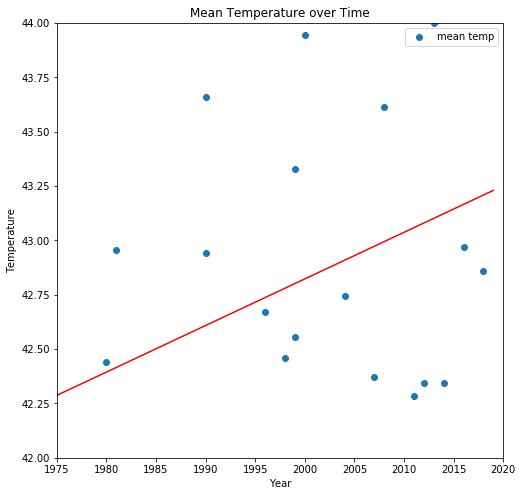

In [66]:
fig = plt.figure(figsize = (8,8))


ax = fig.add_subplot(111)
ax.set(title = 'Mean Temperature over Time',
       xlabel = 'Year',
       ylabel = 'Temperature',
       ylim = [42, 44],
       xlim = [1975, 2020])

ax.scatter(monthly_avg_temp['year'], 
           monthly_avg_temp['mean temp'])

ax.plot(xhat, yhat, color="red")

plt.legend()
plt.show()